<a href="https://colab.research.google.com/github/farhan6978/acm-github-practice/blob/main/spam_email.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
 # Import Libraries
# Importing Numpy & Pandas for data processing & data wrangling
import numpy as np
import pandas as pd

# Importing  tools for visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Import evaluation metric libraries
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, roc_curve, classification_report

# Word Cloud library
from wordcloud import WordCloud, STOPWORDS

# Library used for data preprocessing
from sklearn.feature_extraction.text import CountVectorizer

# Import model selection libraries
from sklearn.model_selection import train_test_split

# Library used for ML Model implementation
from sklearn.naive_bayes import MultinomialNB

# Importing the Pipeline class from scikit-learn
from sklearn.pipeline import Pipeline

# Library used for ignore warnings
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline



In [3]:
# Load Dataset from github repository
df = pd.read_csv("/content/spam.csv", encoding='ISO-8859-1')



In [4]:
# Dataset First Look
# View top 5 rows of the dataset
df.head()


,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [5]:
# Dataset Rows & Columns count
# Checking number of rows and columns of the dataset using shape
print("Number of rows are: ",df.shape[0])
print("Number of columns are: ",df.shape[1])



Number of rows are:  5572
Number of columns are:  5


In [6]:
# Dataset Info
# Checking information about the dataset using info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


In [7]:
# Dataset Duplicate Value Count
dup = df.duplicated().sum()
print(f'number of duplicated rows are {dup}')

number of duplicated rows are 403


In [8]:
# Missing Values/Null Values Count
df.isnull().sum()


,0
v1,0
v2,0
Unnamed: 2,5522
Unnamed: 3,5560
Unnamed: 4,5566


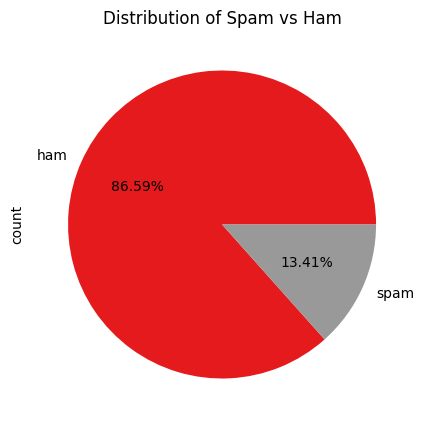

In [14]:
# Chart - 1 Pie Chart Visualization Code For Distribution of Spam vs Ham Messages
spread = df['v1'].value_counts()
plt.rcParams['figure.figsize'] = (5,5)

# Set Labels
spread.plot(kind = 'pie', autopct='%1.2f%%', cmap='Set1')
plt.title(f'Distribution of Spam vs Ham')

# Display the Chart
plt.show()

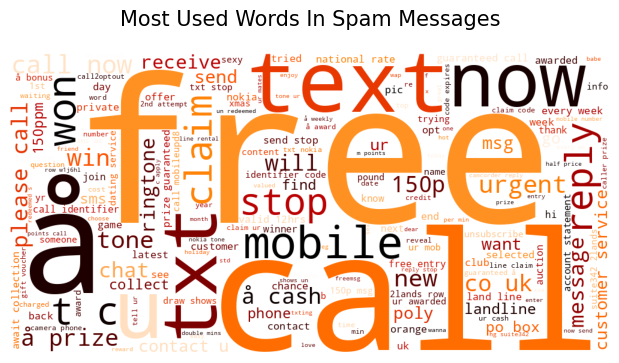

In [15]:
# Splitting Spam Messages
df_spam = df[df['v1']=='spam'].copy()


# Chart - 2 WordCloud Plot Visualization Code For Most Used Words in Spam Messages
# Create a String to Store All The Words
comment_words = ''

# Remove The Stopwords
stopwords = set(STOPWORDS)

# Iterate Through The Column
for val in df_spam.v2:

    # Typecaste Each Val to String
    val = str(val)

    # Split The Value
    tokens = val.split()

    # Converts Each Token into lowercase
    for i in range(len(tokens)):
        tokens[i] = tokens[i].lower()

    comment_words += " ".join(tokens)+" "

# Set Parameters
wordcloud = WordCloud(width = 1000, height = 500,
                background_color ='white',
                stopwords = stopwords,
                min_font_size = 10,
                max_words = 1000,
                colormap = 'gist_heat_r').generate(comment_words)

# Set Labels
plt.figure(figsize = (6,6), facecolor = None)
plt.title('Most Used Words In Spam Messages', fontsize = 15, pad=20)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)

# Display Chart
plt.show()

In [16]:
# Splitting the data to train and test
X_train,X_test,y_train,y_test=train_test_split(df.v2,df.v1,test_size=0.25)

In [22]:
def evaluate_model(model, X_train, X_test, y_train, y_test):
    '''The function will take model, x train, x test, y train, y test
    and then it will fit the model, then make predictions on the trained model,
    it will then print roc-auc score of train and test, then plot the roc, auc curve,
    print confusion matrix for train and test, then print classification report for train and test,
    then plot the feature importances if the model has feature importances,
    and finally it will return the following scores as a list:
    recall_train, recall_test, acc_train, acc_test, roc_auc_train, roc_auc_test, F1_train, F1_test
    '''

    # fit the model on the training data
    model.fit(X_train, y_train)

    # make predictions on the test data
    y_pred_train = model.predict(X_train)
    y_pred_test = model.predict(X_test)
    pred_prob_train = model.predict_proba(X_train)[:,1]
    pred_prob_test = model.predict_proba(X_test)[:,1]

    # Convert string labels to numerical (0 for 'ham', 1 for 'spam')
    label_mapping = {'ham': 0, 'spam': 1}
    y_train_numeric = y_train.map(label_mapping)
    y_test_numeric = y_test.map(label_mapping)
    y_pred_train_numeric = pd.Series(y_pred_train).map(label_mapping).values
    y_pred_test_numeric = pd.Series(y_pred_test).map(label_mapping).values

    # calculate ROC AUC score using numerical true labels and predicted probabilities
    roc_auc_train = roc_auc_score(y_train_numeric, pred_prob_train)
    roc_auc_test = roc_auc_score(y_test_numeric, pred_prob_test)
    print("\nTrain ROC AUC:", roc_auc_train)
    print("Test ROC AUC:", roc_auc_test)

    # plot the ROC curve using numerical true labels and predicted probabilities
    fpr_train, tpr_train, thresholds_train = roc_curve(y_train_numeric, pred_prob_train)
    fpr_test, tpr_test, thresholds_test = roc_curve(y_test_numeric, pred_prob_test)
    plt.plot([0,1],[0,1],'k--')
    plt.plot(fpr_train, tpr_train, label="Train ROC AUC: {:.2f}".format(roc_auc_train))
    plt.plot(fpr_test, tpr_test, label="Test ROC AUC: {:.2f}".format(roc_auc_test))
    plt.legend()
    plt.title("ROC Curve")
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate")
    plt.show()

    # calculate confusion matrix using numerical labels
    cm_train = confusion_matrix(y_train_numeric, y_pred_train_numeric)
    cm_test = confusion_matrix(y_test_numeric, y_pred_test_numeric)

    fig, ax = plt.subplots(1, 2, figsize=(11,4))
    print("\nConfusion Matrix:")
    sns.heatmap(cm_train, annot=True, xticklabels=['Negative', 'Positive'], yticklabels=['Negative', 'Positive'], cmap="Oranges", fmt='.4g', ax=ax[0])
    ax[0].set_xlabel("Predicted Label")
    ax[0].set_ylabel("True Label")
    ax[0].set_title("Train Confusion Matrix")

    sns.heatmap(cm_test, annot=True, xticklabels=['Negative', 'Positive'], yticklabels=['Negative', 'Positive'], cmap="Oranges", fmt='.4g', ax=ax[1])
    ax[1].set_xlabel("Predicted Label")
    ax[1].set_ylabel("True Label")
    ax[1].set_title("Test Confusion Matrix")

    plt.tight_layout()
    plt.show()


    # calculate classification report using numerical labels
    cr_train = classification_report(y_train_numeric, y_pred_train_numeric, output_dict=True)
    cr_test = classification_report(y_test_numeric, y_pred_test_numeric, output_dict=True)
    print("\nTrain Classification Report:")
    crt = pd.DataFrame(cr_train).T
    print(crt.to_markdown())
    print("\nTest Classification Report:")
    crt2 = pd.DataFrame(cr_test).T
    print(crt2.to_markdown())


    precision_train = cr_train['weighted avg']['precision']
    precision_test = cr_test['weighted avg']['precision']

    recall_train = cr_train['weighted avg']['recall']
    recall_test = cr_test['weighted avg']['recall']

    acc_train = accuracy_score(y_true = y_train_numeric, y_pred = y_pred_train_numeric)
    acc_test = accuracy_score(y_true = y_test_numeric, y_pred = y_pred_test_numeric)

    F1_train = cr_train['weighted avg']['f1-score']
    F1_test = cr_test['weighted avg']['f1-score']

    model_score = [precision_train, precision_test, recall_train, recall_test, acc_train, acc_test, roc_auc_train, roc_auc_test, F1_train, F1_test ]
    return model_score


Train ROC AUC: 0.9914666998630649
Test ROC AUC: 0.9915587219343697


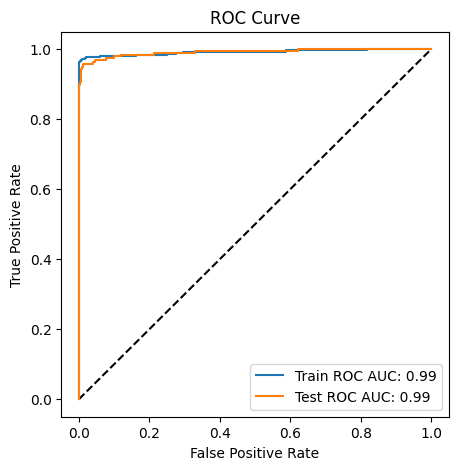


Confusion Matrix:


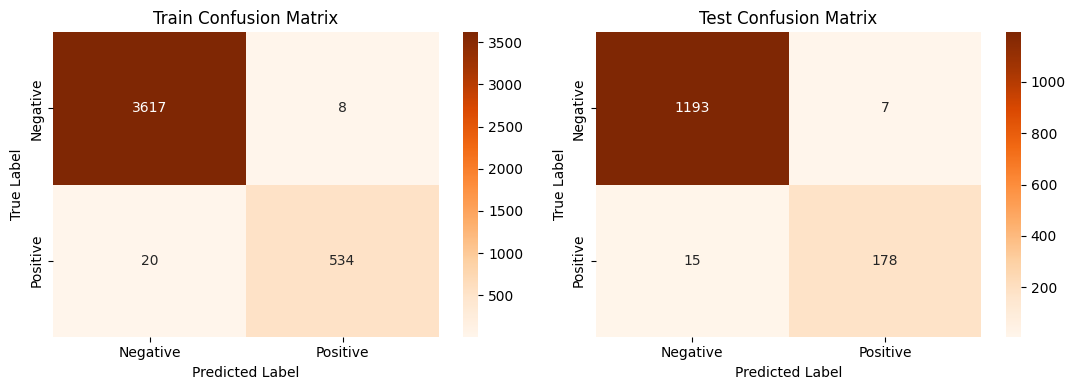


Train Classification Report:
|              |   precision |   recall |   f1-score |   support |
|:-------------|------------:|---------:|-----------:|----------:|
| 0            |    0.994501 | 0.997793 |   0.996144 | 3625      |
| 1            |    0.98524  | 0.963899 |   0.974453 |  554      |
| accuracy     |    0.9933   | 0.9933   |   0.9933   |    0.9933 |
| macro avg    |    0.98987  | 0.980846 |   0.985298 | 4179      |
| weighted avg |    0.993273 | 0.9933   |   0.993269 | 4179      |

Test Classification Report:
|              |   precision |   recall |   f1-score |     support |
|:-------------|------------:|---------:|-----------:|------------:|
| 0            |    0.987583 | 0.994167 |   0.990864 | 1200        |
| 1            |    0.962162 | 0.92228  |   0.941799 |  193        |
| accuracy     |    0.984207 | 0.984207 |   0.984207 |    0.984207 |
| macro avg    |    0.974872 | 0.958223 |   0.966331 | 1393        |
| weighted avg |    0.984061 | 0.984207 |   0.984066 | 139

In [23]:
# ML Model - 1 Implementation
# Create a machine learning pipeline using scikit-learn, combining text vectorization (CountVectorizer)
# and a Multinomial Naive Bayes classifier for email spam detection.
clf = Pipeline([
    ('vectorizer', CountVectorizer()),  # Step 1: Text data transformation
    ('nb', MultinomialNB())  # Step 2: Classification using Naive Bayes
])

# Model is trained (fit) and predicted in the evaluate model
# Visualizing evaluation Metric Score chart
MultinomialNB_score = evaluate_model(clf, X_train, X_test, y_train, y_test)

In [24]:
# Defining a function for the Email Spam Detection System
def detect_spam(email_text):
    # Load the trained classifier (clf) here
    # Replace the comment with your code to load the classifier model

    # Make a prediction using the loaded classifier
    prediction = clf.predict([email_text])

    if prediction == 0:
        return "This is a Ham Email!"
    else:
        return "This is a Spam Email!"

     # Example of how to use the function
sample_email = 'Free Tickets for IPL'
result = detect_spam(sample_email)
print(result)

This is a Spam Email!
